<a href="https://colab.research.google.com/github/Sharan-Babu/CopyCatch/blob/main/CopyCatch_%F0%9F%8E%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CopyCatch** 🔎📺




**Enter Inputs**

In [ ]:
Search_Term = "Google's next $1 Trillion Opportunity"  #@param {type: "string"}
No_of_Videos_to_Search = 2  #@param {type: "slider", min: 1, max: 5}

**Upload Image** 

In [ ]:
from google.colab import files
source = files.upload()
source = list(source.keys())[0]
print("Image upload successful")

Saving sundar.jpg to sundar (1).jpg
Image upload successful


Your uploaded Image:


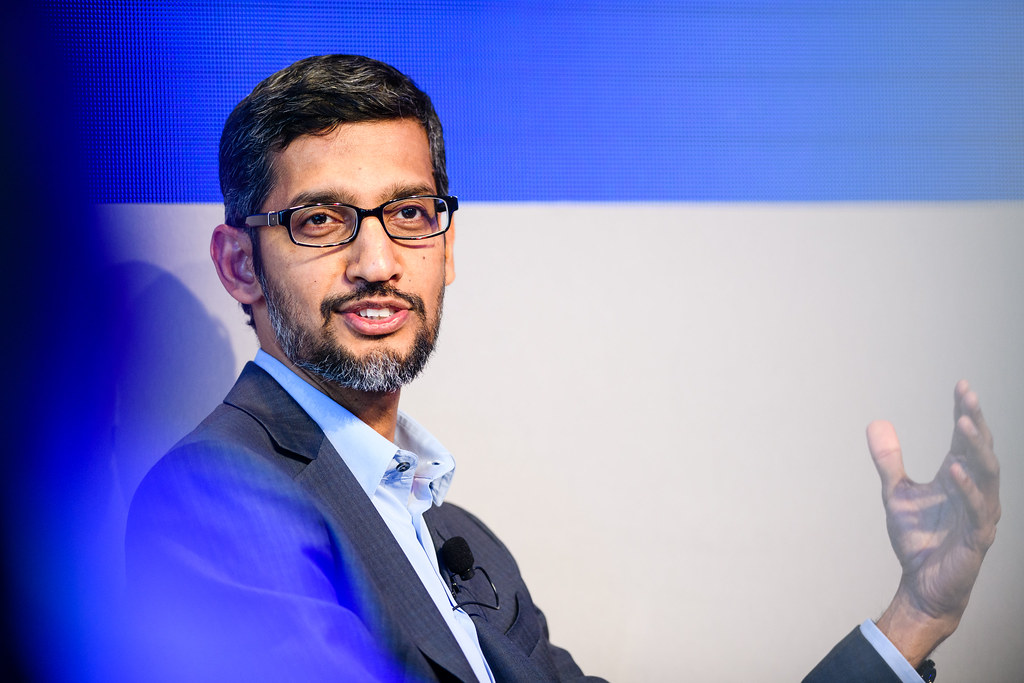

In [ ]:
print("Your uploaded Image:")
display(Image(source,width=300))

## *Run All Cells from Here*


In [ ]:
!pip install pytube opencv-python modzy-sdk scikit-image

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from time import sleep
from modzy import ApiClient  
from modzy._util import file_to_bytes
from skimage import metrics
from pytube import YouTube, Search
from IPython.display import Image
from IPython.core.display import HTML 

In [ ]:
reference_image = source
search_term = Search_Term
number_of_vids = No_of_Videos_to_Search

vids_info = []

print("Searching Videos")
search_results = Search(search_term).results[:number_of_vids]


# Class for Videos to be returned to User
class Videos:
	def __init__(self, vid, title, thumbnail, keywords, frame):
		self.url = "http://youtube.com/watch?v=" + vid
		self.title = title
		self.thumbnail = thumbnail
		self.keywords = ", ".join(keywords)

		# Save Frame
		cv2.imwrite(f"{vid}img.png",frame)
		self.frame = vid + "img.png"

		
# Set Modzy Client and Helper Function
client = ApiClient(base_url="https://app.modzy.com/api", api_key="fMkbSK9GncCWlutFbxKl.xBx2yBzLoHQfHMsrQm8V")

def modzy_process(picture):
	sources = {}
	sources["my-input"] = {"image": file_to_bytes(picture)}
	job = client.jobs.submit_file("899doc921x", "0.0.1", sources)
	result = client.results.block_until_complete(job, timeout=None)
	model_output = result.get_first_outputs()['results.json']
	return model_output

print("Talking to Modzy AI")
reference_face_embedding = modzy_process(reference_image)["embedding"]

# Convert Video Frame to numpy array
def cv2_to_numpy(frame):
    return np.array(frame) # dtype <optional> , dtype=np.uint8	

# Cosine Similarity Function
def cosine_similarity(vec1, vec2):
	result = np.dot(vec1, vec2) / (np.linalg.norm(vec1)*np.linalg.norm(vec2))
	return result

# Flatten n-d array
def flatten(x):
    return x.flatten()

# Frame Similarity
def ssim_similarity(image1, image2):
	result = metrics.structural_similarity(image1, image2, multichannel = True)    	
	return result

def catchcopy(vid_name,video_id,video_title,video_thumbnail,video_keywords):
	count = 0
	cap = cv2.VideoCapture(vid_name)
	print(f"Video '{vid_name}' loading")

	previous_frame = None

	while(cap.isOpened()):
		ret, frame = cap.read()
		if ret == True:
					
			# Convert frame to numpy array
			current_array = cv2_to_numpy(frame)

			# Write current frame image
			cv2.imwrite("current_frame_img.png",current_array) 
			sleep(0.1)
			

			if previous_frame is not None:

				# Compare Frame similarity to save computations
				#similarity = cosine_similarity(flatten(previous_frame),flatten(current_array))
				similarity = ssim_similarity(current_array,previous_frame)
				print(f"Similarity between subsequent frames is: {similarity}")
				if similarity > 0.7: 
					print("Previous Frame too similar") 
				else:
					try:
						# Use Modzy Facial Embedding model
						print("Running Facial Embedding Model")
						result_embedding = modzy_process("current_frame_img.png")["embedding"] 
					except:
						previous_frame = current_array
						count += 60	
						cap.set(cv2.CAP_PROP_POS_FRAMES, count)	
						continue	

					# Vector Similarity to determine match	
					final_similarity = cosine_similarity(reference_face_embedding,result_embedding)
					print(f"Face similarity is {final_similarity}")
					if final_similarity > 0.7: 
						video_item = Videos(video_id,video_title,video_thumbnail,video_keywords,current_array)
						vids_info.append(video_item)
						print(f"\n Match was Found!\n")
						break
			else:
				previous_frame = current_array
			count += 60	
			cap.set(cv2.CAP_PROP_POS_FRAMES, count)	# Jump by 2 seconds
			previous_frame = current_array	
				
		else:
			break
			
	cap.release()


#catchcopy("What Is Googles Biggest Moonshot.mp4",'a','b','c',['1','2'])	

for video in search_results:
	i = 1 # video counter
		
	video_id = video.video_id
	video_title = video.title
	video_loc = "VideoFile" + str(i) + ".mp4"
	video_thumbnail = video.thumbnail_url
	video_keywords = video.keywords

	yt = YouTube("http://youtube.com/watch?v=" + video_id)
	mp4files = yt.streams.filter(file_extension='mp4', progressive=True)
	video_file = mp4files[-1]
	video_file.download(filename=video_loc, skip_existing=True)
	sleep(0.1)

	catchcopy(video_loc,video_id,video_title,video_thumbnail,video_keywords)
	sleep(0.1)

	i += 1	

print('\n')

Searching Videos
Talking to Modzy AI
Video 'VideoFile1.mp4' loading
Similarity between subsequent frames is: 0.7480808450891759
Previous Frame too similar
Similarity between subsequent frames is: 0.8896986103652716
Previous Frame too similar
Similarity between subsequent frames is: 0.6391706382801023
Running Facial Embedding Model
Face similarity is 0.7771409983755431

 Match was Found!

Video 'VideoFile1.mp4' loading
Similarity between subsequent frames is: 0.8301640058733009
Previous Frame too similar
Similarity between subsequent frames is: 0.7688306301340727
Previous Frame too similar
Similarity between subsequent frames is: 0.8880200960807881
Previous Frame too similar
Similarity between subsequent frames is: 0.8758296474968469
Previous Frame too similar
Similarity between subsequent frames is: 0.906761711023222
Previous Frame too similar
Similarity between subsequent frames is: 0.3869267615211112
Running Facial Embedding Model
Face similarity is 0.6322801017202694
Similarity betw

**Results**

Details Found:

1)
Title: Google's Next $1 Trillion Opportunity
Video Keywords: Bloomberg

Thumbnail:



Matched Image:


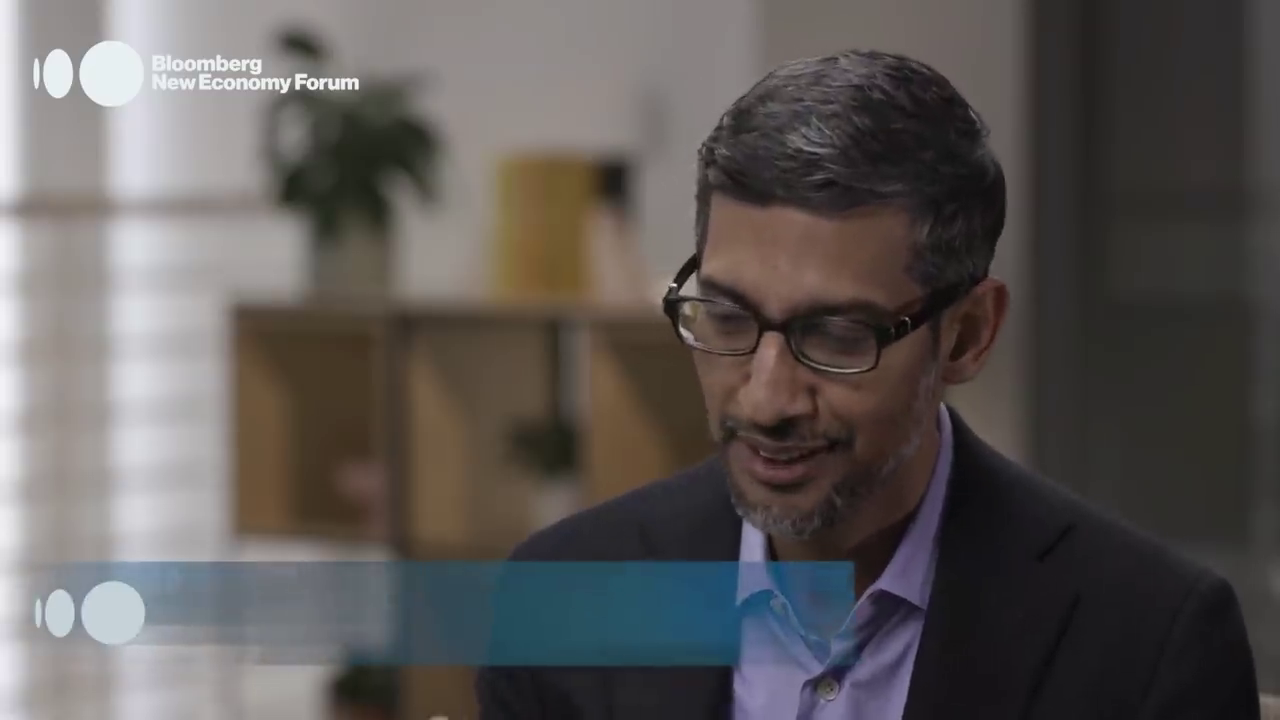

URL: http://youtube.com/watch?v=XkdA3HiQKc8


2)
Title: What Is Google's Biggest Moonshot?
Video Keywords: Bloomberg

Thumbnail:



Matched Image:


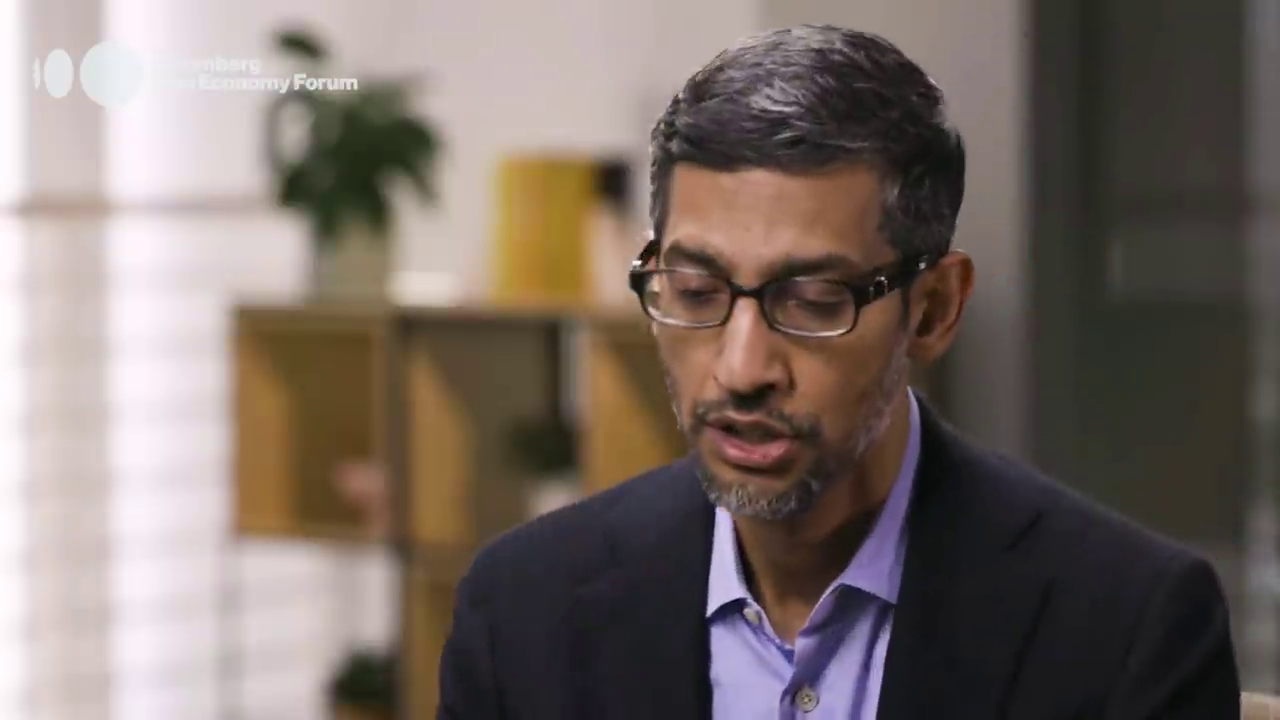

URL: http://youtube.com/watch?v=SPp_BSnpOqI




In [ ]:
print('Details Found:\n')
i = 1
for video in vids_info:
    print(f"{i})")
    print(f"Title: {video.title}")
    print(f"Video Keywords: {video.keywords}")
    print("\nThumbnail:")
    display(Image(url= video.thumbnail,width=300))
    print(f"\nMatched Image:")
    display(Image(video.frame,width=300))
    print(f"URL: {video.url}\n")
    i += 1
    print()